In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TODO: consolidate functions, could be less.

For all graphs : I want raw, fraction, & ratio. 

## PhyloP VS rarity

In [11]:
data_base_path="/home/mcn26/varef/scripts/noon_data/2.count/"

In [12]:
# Load the data into a pandas DataFrame

df = pd.read_csv(data_base_path+"phylop_count_table/part-00000-87042641-8cad-4c73-99f7-3b2ad1c52afc-c000.csv")

In [78]:


# Define a function to plot count per "category" conditioned on "phylop_significant"

rarity_order = ["SINGLETON", "ULTRARARE", "RARE", "LOW_FREQ", "COMMON"]

def plot_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    

    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('phylop_significant')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
    else:
        value_col = 'count'
        ylabel = 'Count'


    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y=value_col, hue='phylop_significant', data=subset_df,order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}Count per Category Conditioned on Phylop Significant\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    if normalize:
        plt.ylim(0, 0.6)
    plt.ylabel(ylabel)
    plt.show()

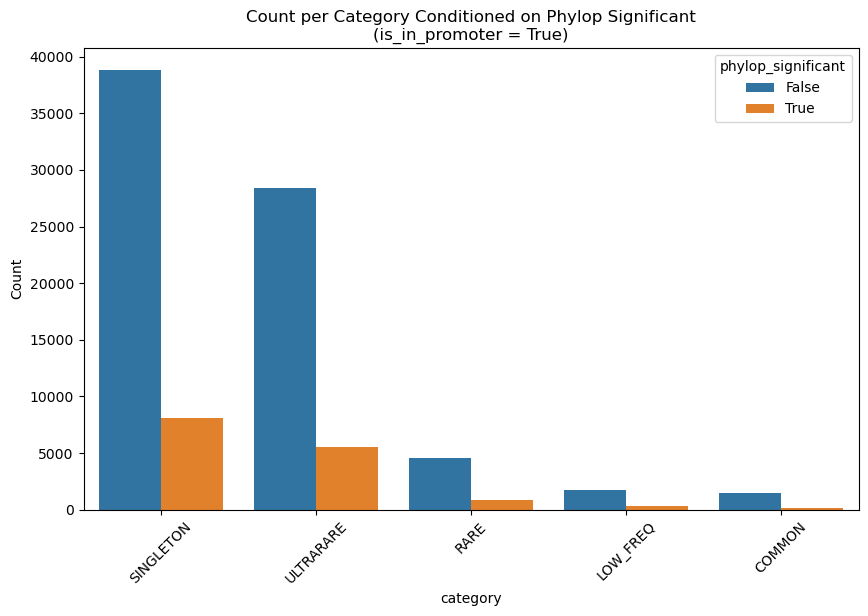

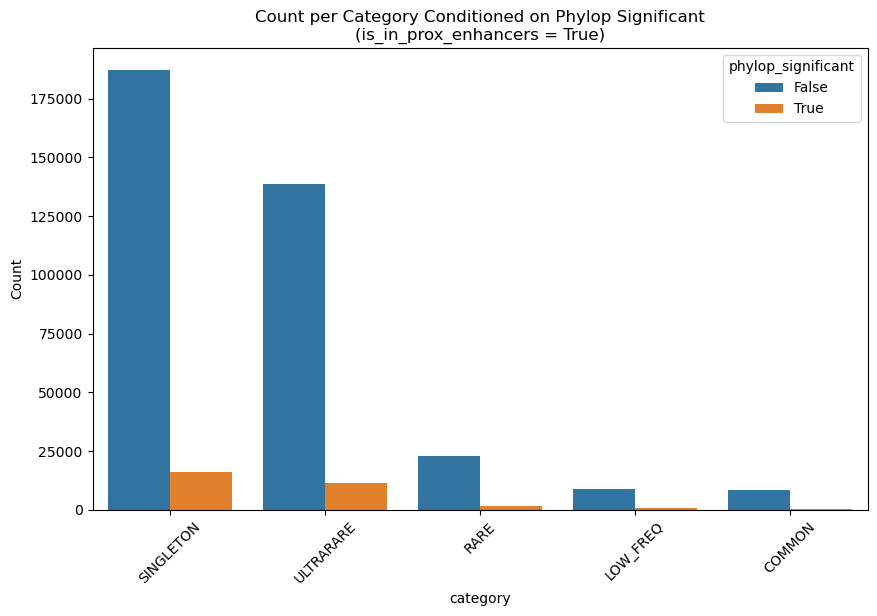

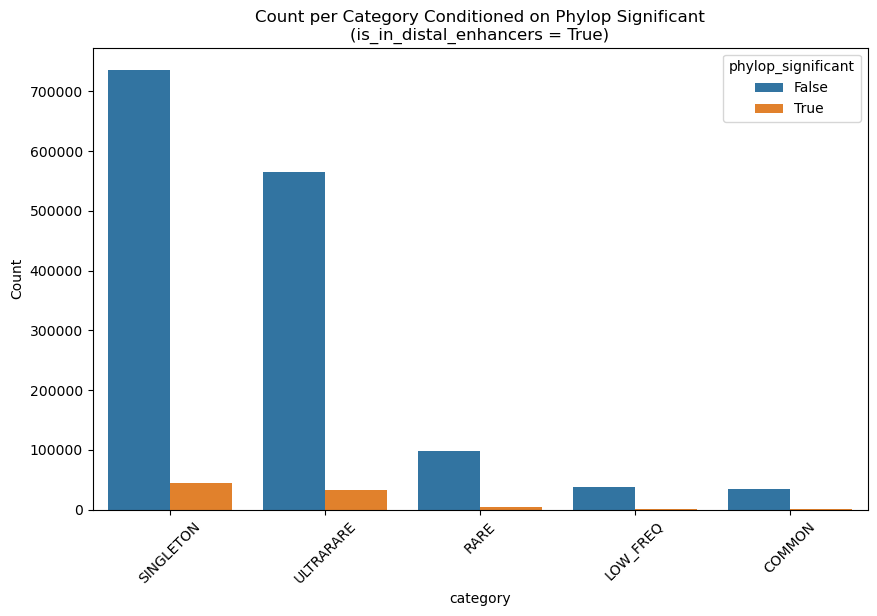

In [79]:

for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_count_by_category(df, var,False)

/tmp/ipykernel_2709677/1836817577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


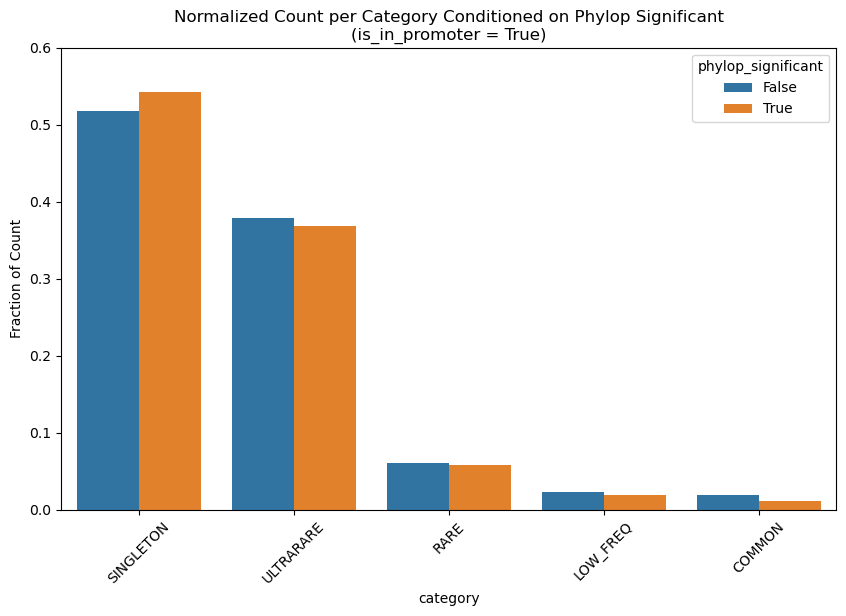

/tmp/ipykernel_2709677/1836817577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


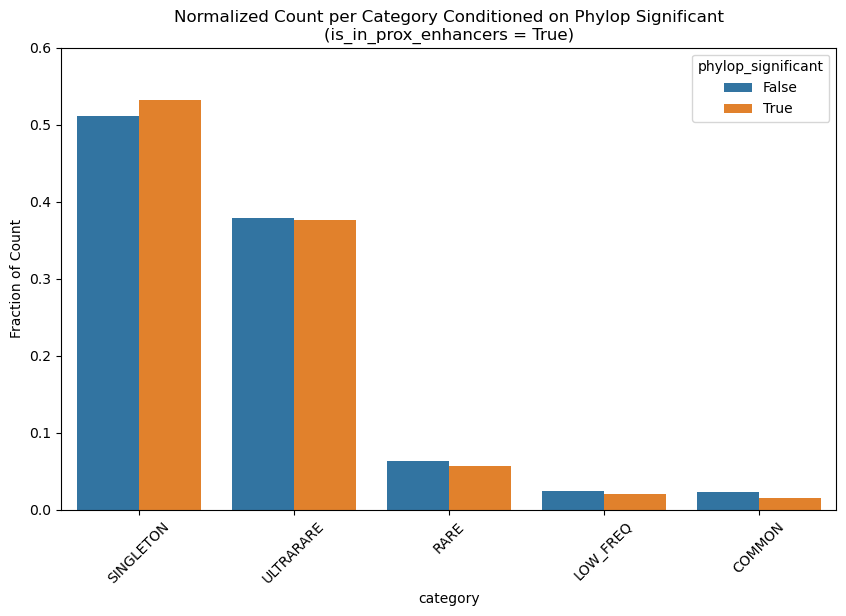

/tmp/ipykernel_2709677/1836817577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


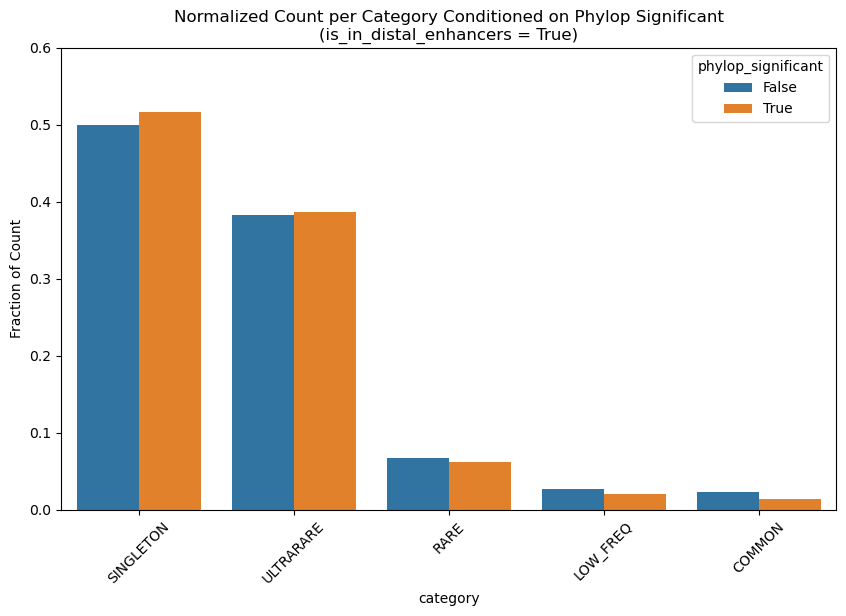

In [80]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_count_by_category(df, var,True)

In [76]:

def lump_rarity_categories(row):
    
    if row["category"] in ["SINGLETON","ULTRARARE","RARE"]:
        return "RARE"
    elif row["category"] == "COMMON" :
        return "COMMON"
    else:
        return "not_interesting"


def plot_fraction(df, genomic_region,to_plot):
    subset_df = df[df[genomic_region]]
    
    
    subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)
    
    subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
    
    total_counts = subset_df.groupby([to_plot,'rarity_bin'])['count'].sum().unstack()
    
    total_counts["ratio"]=total_counts["COMMON"]/total_counts["RARE"]
    
    plt.figure(figsize=(5, 5))
    
    sns.barplot(total_counts,y="ratio",x=to_plot)
    
    plt.xticks(rotation=45)
    
    plt.title(genomic_region)
    plt.ylim(0, 0.025)
    
    plt.show()
    

/tmp/ipykernel_2709677/1695306634.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


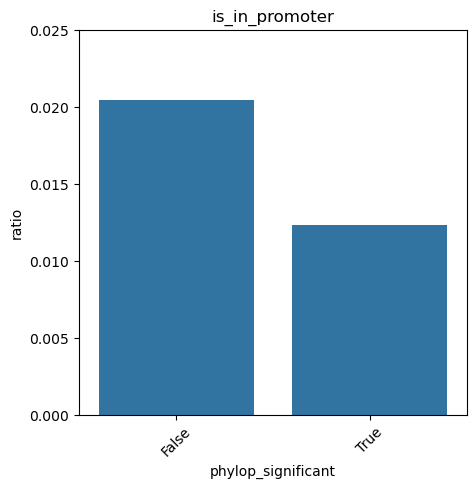

/tmp/ipykernel_2709677/1695306634.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


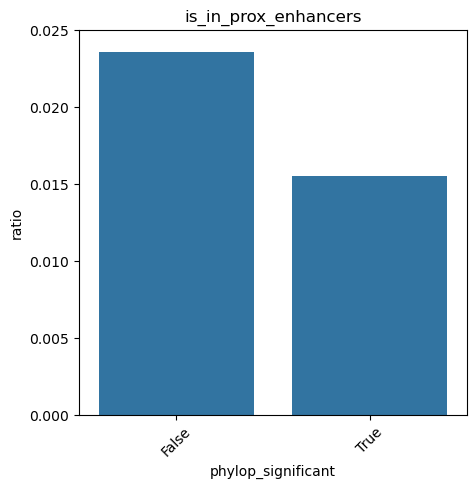

/tmp/ipykernel_2709677/1695306634.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


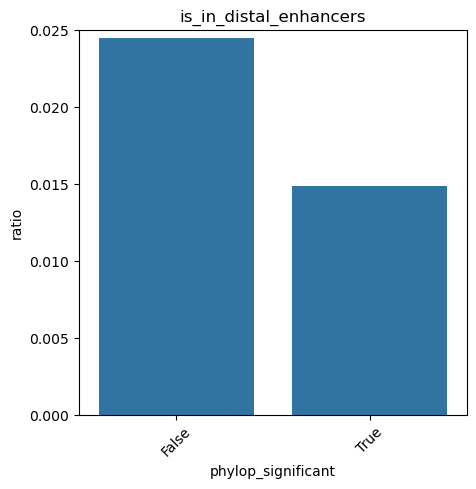

In [77]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_fraction(df, var,"phylop_significant")

## CADD vs rarity

load & munge data

In [84]:
#load
df_cadd = pd.read_csv(data_base_path+"CADD_count_table/part-00000-dbacbb21-41f6-4985-baad-247ac83e37a8-c000.csv")

###convert the boolean "in CADD category" cutoff to "mosst strict CADD cutoff row is counting". 
x_columns = ["CADD>=10","CADD>=20","CADD>=30","CADD>=40","CADD>=50"][::-1]  
# We reverse the list so we check from right to left : from most to least strict
#picking the strictest category to call as our 

# Function to find the column with True value
def find_true_column(row, columns,default):
    return next((col for col in columns if row[col]), default)

# Apply the function to each row
df_cadd['CADD_category'] = df_cadd.apply(find_true_column, columns=x_columns, default='CADD<10', axis=1)

In [59]:
#print : for testing
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(df_cadd)

Define & run function to plot cadd counts by genomic location type

In [85]:
def plot_cadd_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    graph_version="none"
    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('CADD_category')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)

        
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
        graph_version="Fraction : noramlized so each CADD threshold sums to 1"
    else:
        value_col = 'count'
        ylabel = 'Count'
        graph_version="Count"


    plt.figure(figsize=(10, 6))
    sns.barplot(x='CADD_category', y=value_col, hue='category', data=subset_df,order=["CADD<10"]+x_columns[::-1],hue_order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}{graph_version}\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.show()

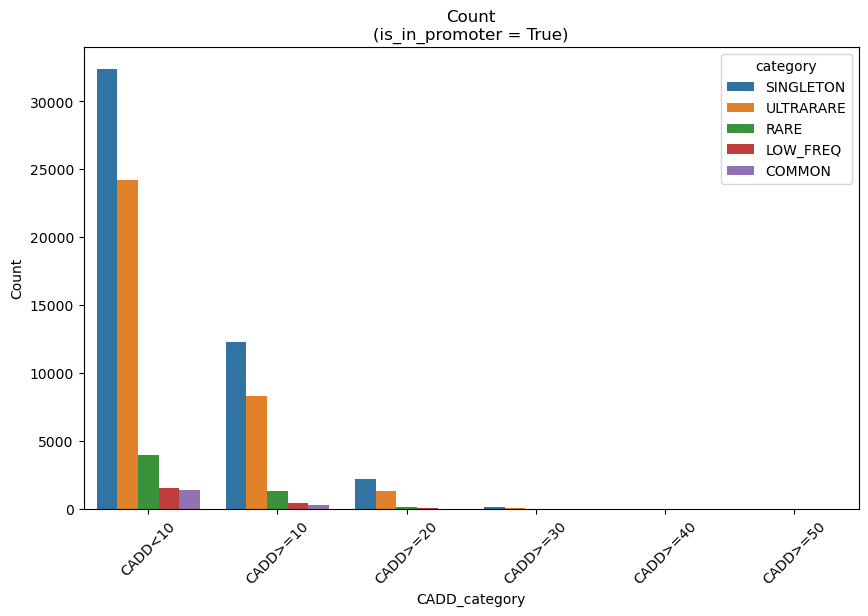

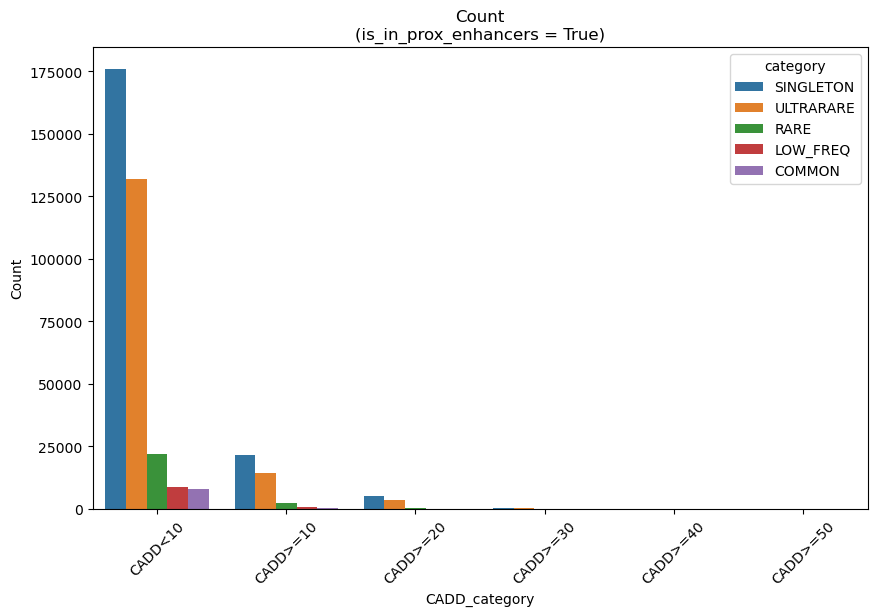

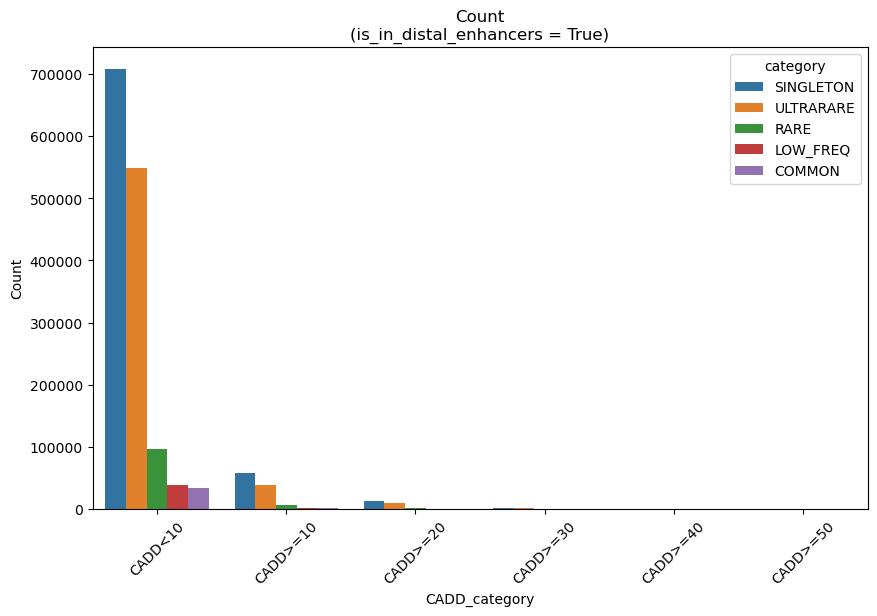

In [86]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_cadd_count_by_category(df_cadd, var,False)

/tmp/ipykernel_2709677/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


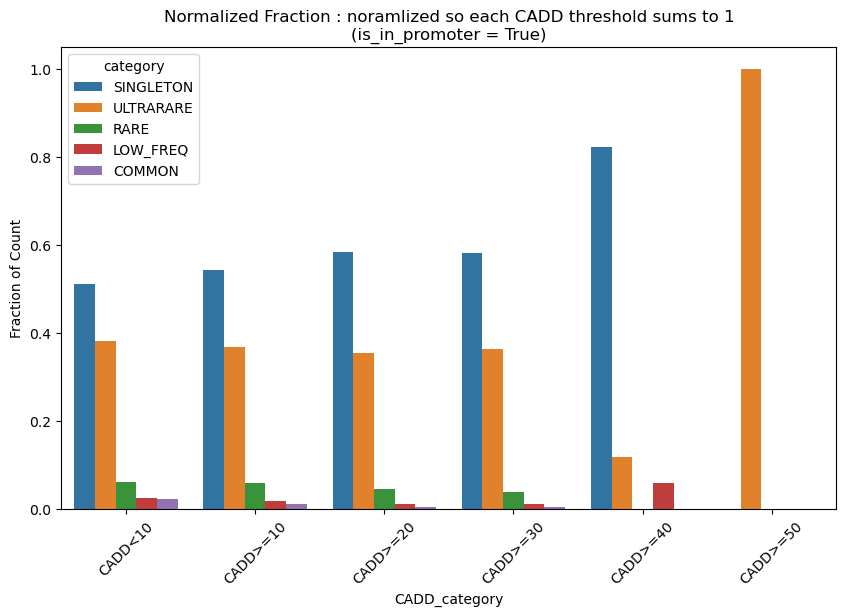

/tmp/ipykernel_2709677/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


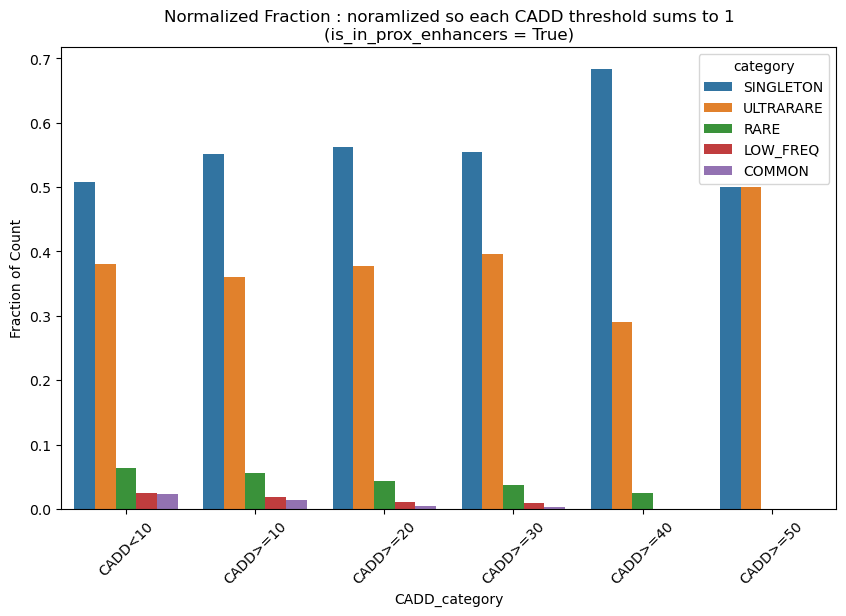

/tmp/ipykernel_2709677/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


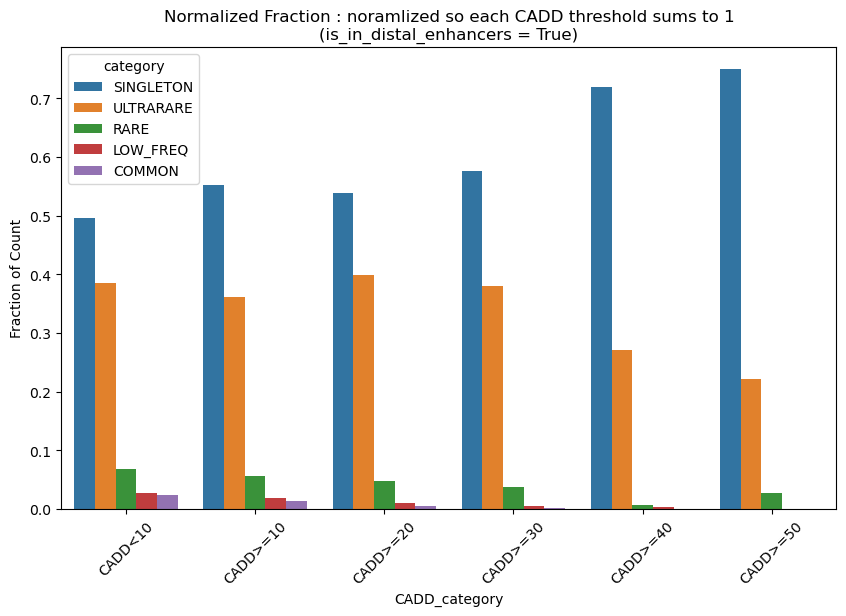

In [87]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_cadd_count_by_category(df_cadd, var,True)

Compute ratio common over rare. 

/tmp/ipykernel_2709677/4029494044.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


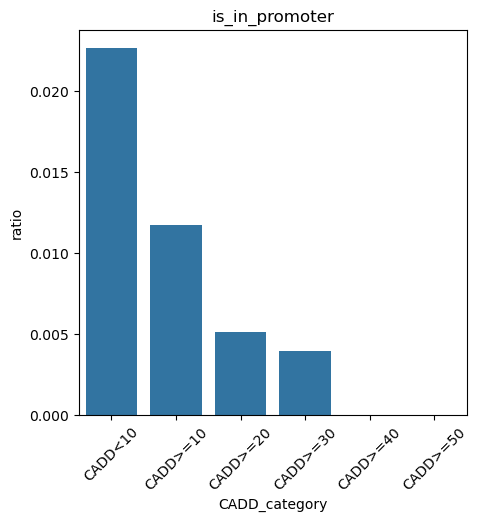

/tmp/ipykernel_2709677/4029494044.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


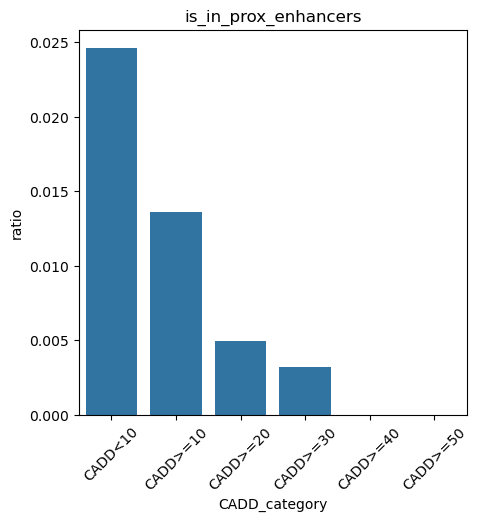

/tmp/ipykernel_2709677/4029494044.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


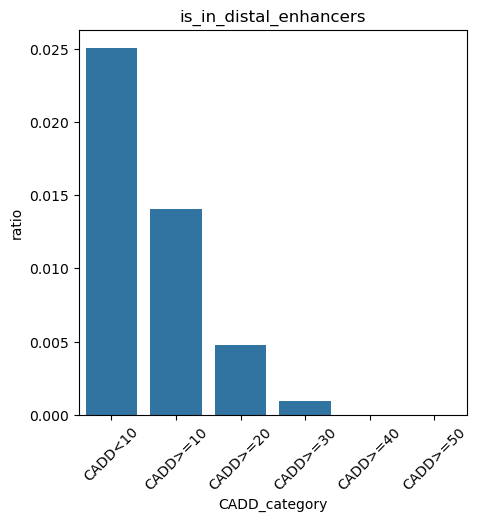

In [73]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_fraction(df_cadd,var,"CADD_category")

## Malinouis

In [74]:
df_mal = pd.read_csv(data_base_path+"malinouis_skew_and_thresh/part-00000-6b35a1d2-5569-479a-b13d-92586e8b0841-c000.csv",)

In [91]:

skew_columns=[]
ref_columns=[]

for i in df_mal.columns:
    if "mean_skew" in i :
        skew_columns.append(i)
    elif "mean_ref" in i :
        ref_columns.append(i)

In [109]:
skew_columns

['mean_skew<=-0-8',
 '-0-8<mean_skew<=-0-6000000000000001',
 '-0-6000000000000001<mean_skew<=-0-4',
 '-0-4<mean_skew<=-0-2',
 '-0-2<mean_skew<=0-0',
 '0-0<mean_skew<=0-2',
 '0-2<mean_skew<=0-4',
 '0-4<mean_skew<=0-6000000000000001',
 'mean_skew>0-6000000000000001']

In [96]:
df_mal['mean_skew'] = df_mal.apply(find_true_column, columns=skew_columns, default='Error', axis=1)
df_mal['mean_ref'] = df_mal.apply(find_true_column, columns=ref_columns, default='Error', axis=1)
df_mal["rarity_bin"]=df_mal.apply(lump_rarity_categories,axis=1)

In [156]:
def plot_2d(df, genomic_region,x,y,count_or_ratio):
    subset_df = df[df[genomic_region]]
    
    
    total_counts = subset_df.groupby([x,y,'rarity_bin'])['count'].sum().unstack()
    
    if count_or_ratio=="ratio":
        subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
        total_counts["ratio"]=total_counts["COMMON"]/total_counts["RARE"]
    elif count_or_ratio=="count":
        
        total_counts["count"]=total_counts[['COMMON','RARE','not_interesting']].sum(axis=1)
        
    
    
    plt.figure(figsize=(10, 10))
    
    pivot_table = total_counts.pivot_table(index='mean_skew', columns='mean_ref', values=count_or_ratio)#, aggfunc='mean'
    
    pivot_table = pivot_table.reindex(skew_columns[::-1], axis=0)
    pivot_table = pivot_table.reindex(ref_columns, axis=1)
    
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title(f"{count_or_ratio}_{genomic_region}")
    plt.show()
    

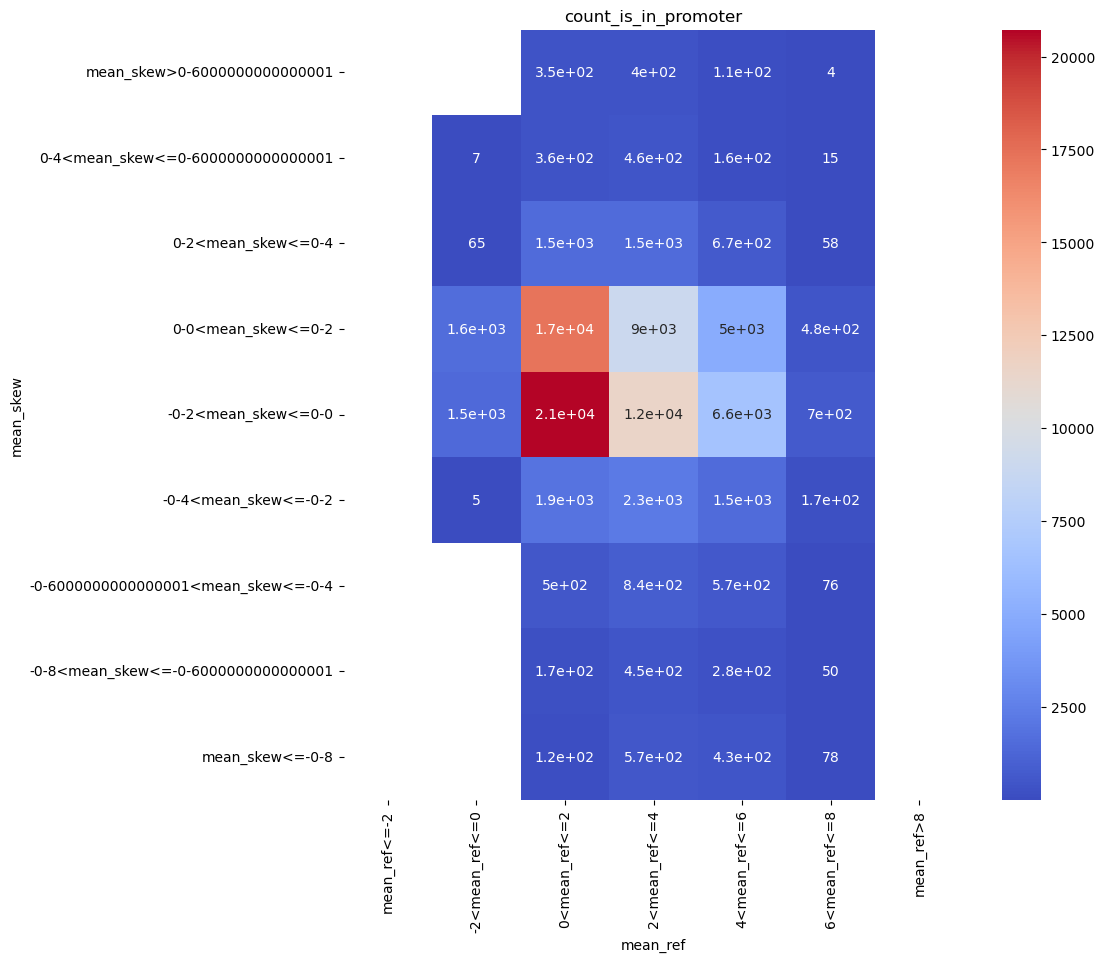

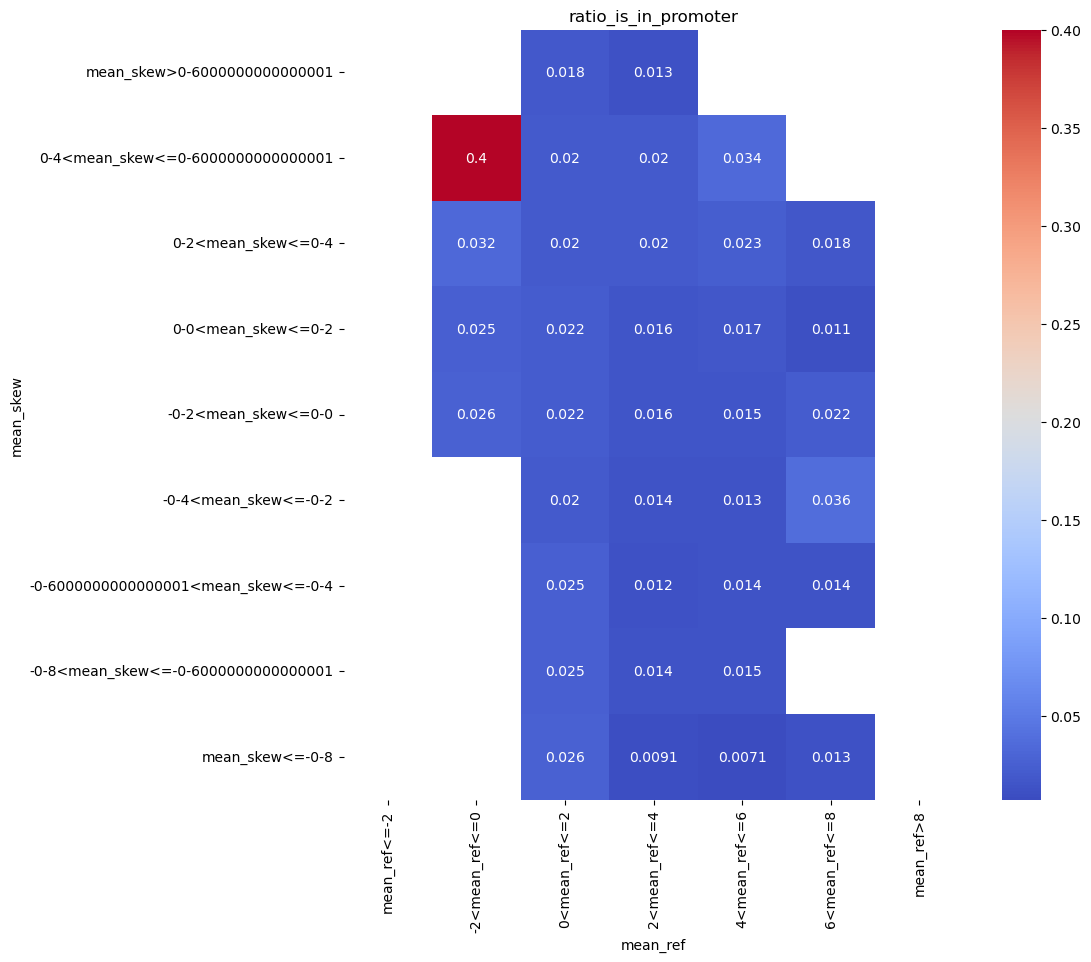

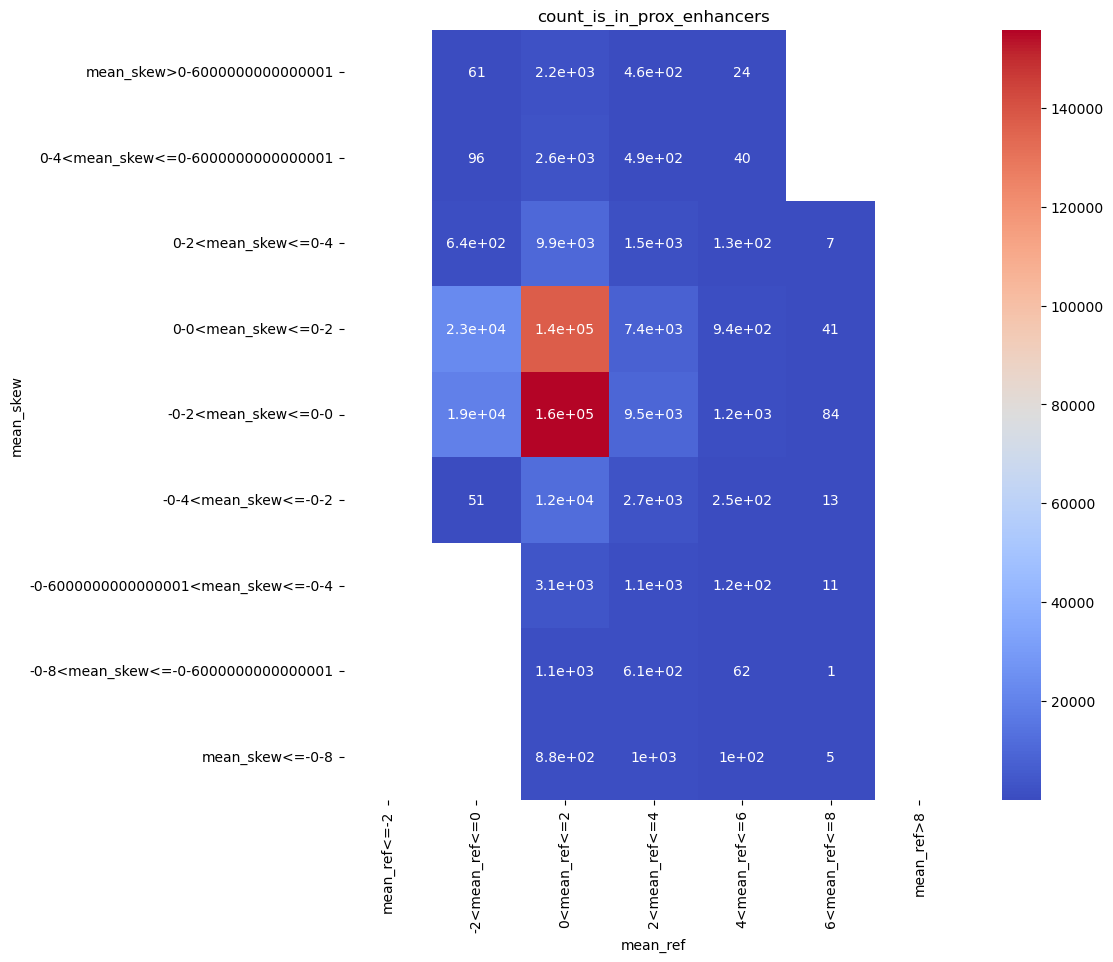

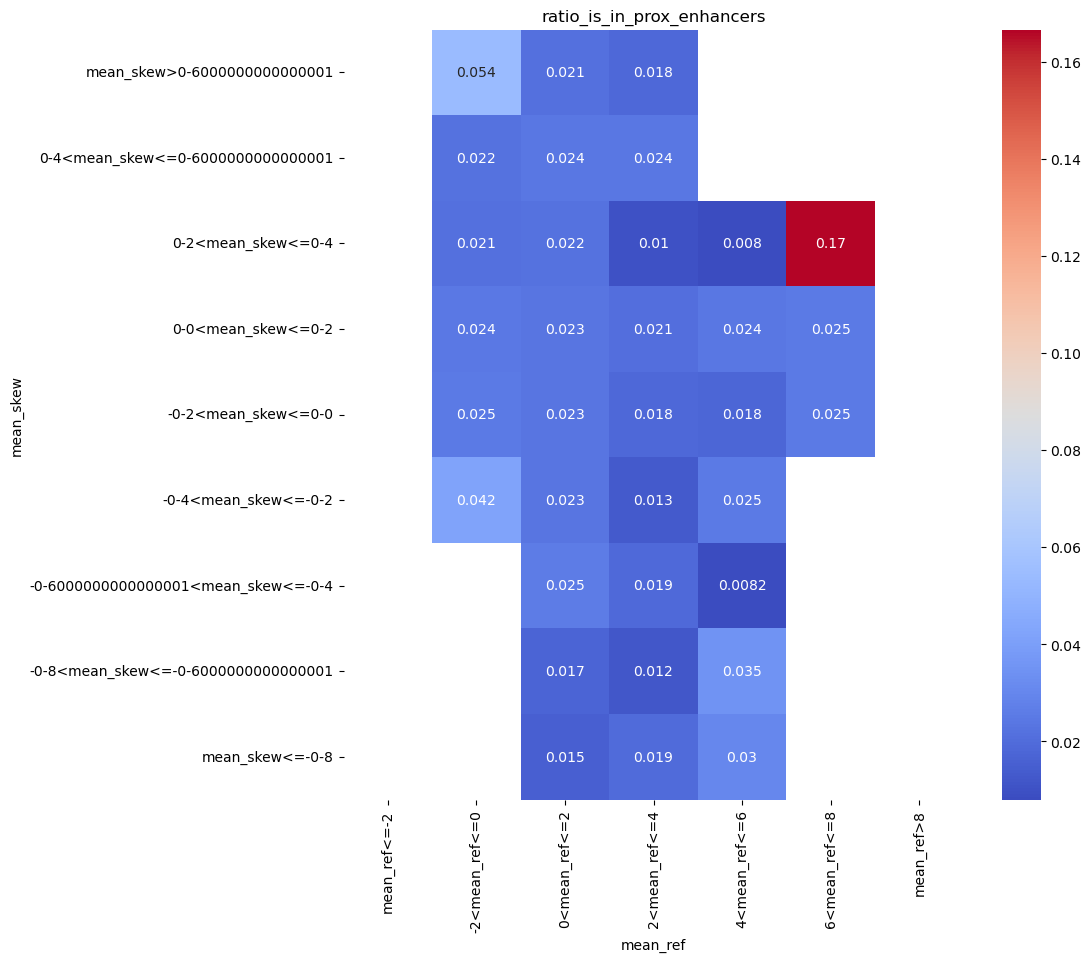

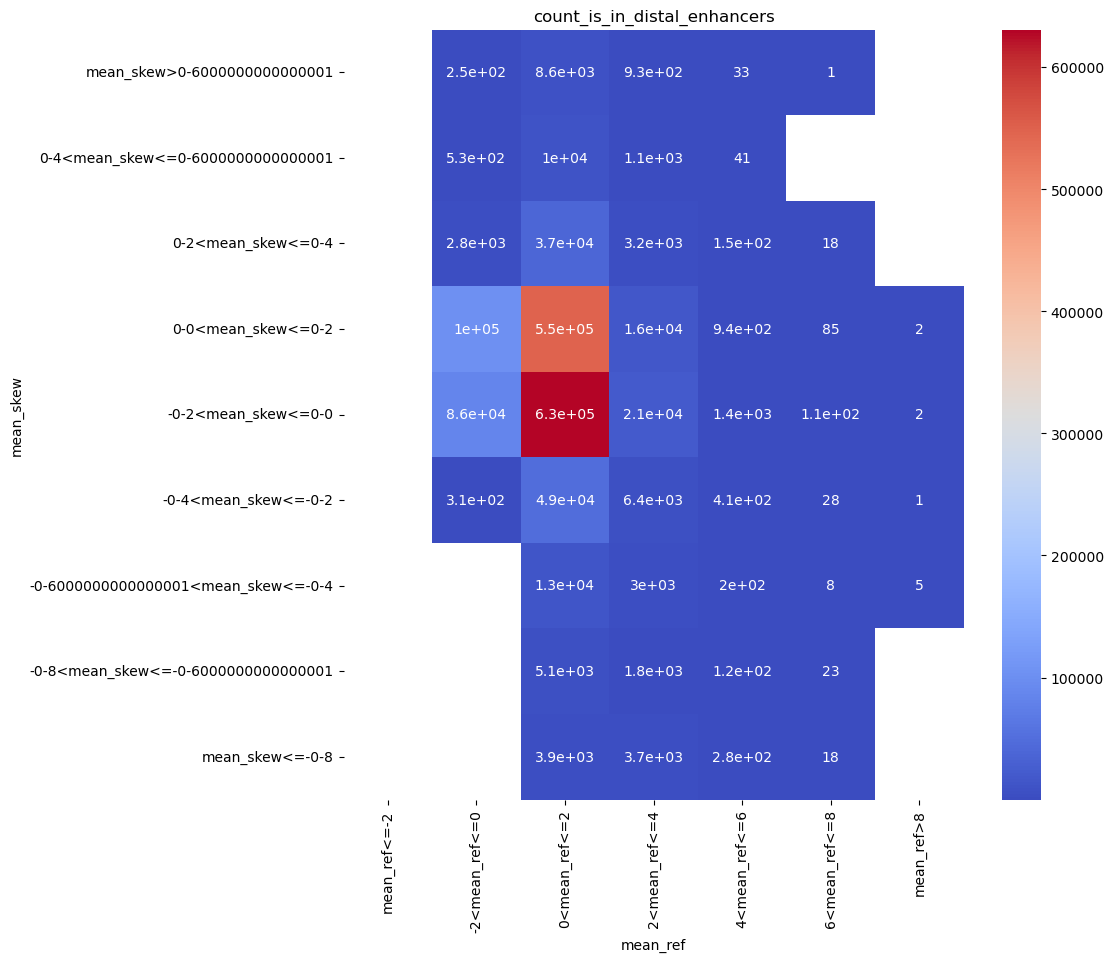

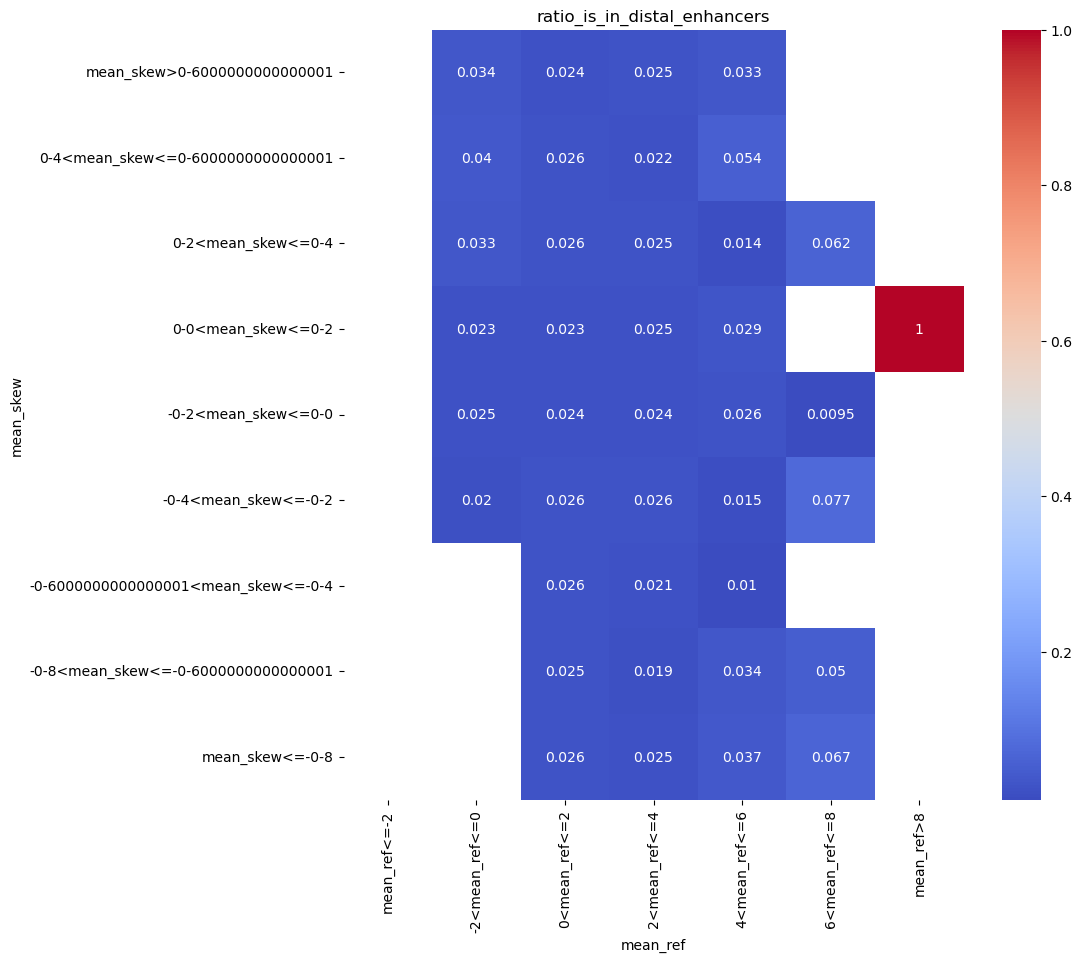

In [158]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_2d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref",count_or_ratio="count")
    plot_2d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref",count_or_ratio="ratio")
